# Crossref Citation Stats

## Data Provenance

The data was retrieved in August 2019 via the [Crossref API](http://api.crossref.org/works) (the download should include everything at least up to 05 Aug 2019, having started on the 06th taking over a week). ([The raw responses LZMA zipped](https://doi.org/10.6084/m9.figshare.7081037) take about 35 GB disk space - TODO update link)

## Data Preprocessing

The data was then preprocessed to get calculate some high level stats over the data which are then analysed in this notebook.

The files are available here:
* [crossref-works-summaries-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2019-08-06/crossref-works-summaries-stat.tsv.gz) - Overall summary stats
* [crossref-works-summaries-by-type-and-publisher-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2019-08-06/crossref-works-summaries-by-type-and-publisher-stat.tsv.gz) - Summary stats grouped by _type_ and _publisher_ 
* [crossref-works-reference-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2019-08-06/crossref-works-reference-stat.tsv.gz) - Stats relating to open access (oa) references

Related, but not used for the stats in this notebook:
* [citation links](https://doi.org/10.6084/m9.figshare.7081091)

## Notes

The *reference\_count* and *referenced\_by\_count* are counts provided by Crossref. *num\_references* are the number of references that are actually accessible via the API (i.e. oa).

## Scripts

The scripts can be found in [this repository](https://github.com/elifesciences/datacapsule-crossref), see [README](https://github.com/elifesciences/datacapsule-crossref/blob/analysis/README.md). Using those scripts the data can be updated (but it will take some time to retrieve all of the Crossref data).

Link to this notebook: https://elifesci.org/crossref-data-notebook

In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import Markdown, display

In [3]:
plt.style.use('ggplot')

def printmd(string):
    display(Markdown(string))

In [4]:
data_path = '../data'
summary_stats_filename = 'crossref-works-summaries-stat.tsv.gz'
summary_by_type_and_publisher_stats_filename = 'crossref-works-summaries-by-type-and-publisher-stat.tsv.gz'
reference_stats_filename = 'crossref-works-reference-stat.tsv.gz'

In [5]:
df_summary = pd.read_csv(os.path.join(data_path, summary_stats_filename), sep='\t')

# drop non-numeric stat value 'type' and convert to numeric values
df_summary = df_summary[
    df_summary['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary = df_summary.set_index('stat')
df_summary

,doi,title,reference_count,referenced_by_count,created,type,publisher,container_title,author_count,first_subject_area,subject_areas,has_references,num_references,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
stat,,,,,,,,,,,,,,,,,
count,109738648.0,109738648.0,1.097386e+08,1.097386e+08,109738648.0,109738648.0,109738648.0,109738648.0,109738648.0,109738648.0,109738648.0,1.097386e+08,1.097386e+08,1.097386e+08,1.097386e+08,109738648.0,109738648.0
count_non_zero,NaN,NaN,4.899232e+07,4.892371e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.794741e+07,2.794741e+07,2.497571e+07,1.190243e+06,NaN,NaN
count_numeric,NaN,NaN,1.097386e+08,1.097386e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097386e+08,1.097386e+08,1.097386e+08,1.097386e+08,NaN,NaN
count_valid,109738648.0,105033354.0,1.097386e+08,1.097386e+08,109738648.0,109715020.0,109736842.0,103339230.0,90402300.0,34224140.0,34224140.0,1.097386e+08,1.097386e+08,1.097386e+08,1.097386e+08,109738648.0,109738648.0
count_zero,NaN,NaN,6.074632e+07,6.081493e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.179123e+07,8.179123e+07,8.476294e+07,1.085484e+08,NaN,NaN
max,NaN,NaN,2.581400e+04,1.465760e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.579800e+04,1.158400e+04,3.908000e+03,NaN,NaN
mean,NaN,NaN,1.318010e+01,9.056722e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.546725e-01,7.755687e+00,2.582804e+00,2.745796e-02,NaN,NaN
mean_non_zero,NaN,NaN,2.952230e+01,2.031474e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,3.045357e+01,1.134836e+01,2.531583e+00,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [6]:
print('total work count: {:,}'.format(int(df_summary['reference_count']['count'])))

total work count: 109,738,648


In [7]:
DEFAULT_NUMBER_FORMAT = '{:,.0f}'
DEFAULT_PERCENTAGE_FORMAT = '{:,.2f}%'
format_count = lambda c, number_format=DEFAULT_NUMBER_FORMAT: number_format.format(c)
format_percentage = lambda c, number_format=DEFAULT_PERCENTAGE_FORMAT: number_format.format(c)

def apply_columns(df, columns, f):
    for c in columns:
        df[c] = df[c].apply(f)
    return df

def format_columns(df):
    for c in df.columns:
        if str(c).startswith('p_'):
            df[c] = df[c].apply(format_percentage)
        else:
            df[c] = df[c].apply(format_count)
    return df

def show_counts(counts, title='', number_format=DEFAULT_NUMBER_FORMAT, **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')['count']
    else:
        df = counts
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height(), number_format=number_format),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

### Work counts

Out of the *48,992,325* works with references in Crossref, **57.04%** are open (*27,947,414*).

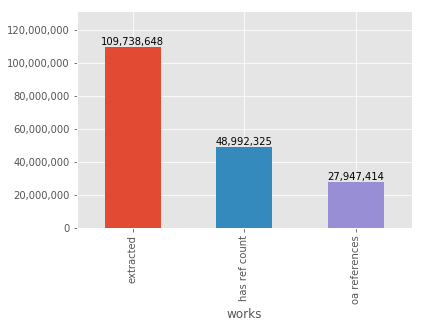

In [8]:
printmd('### Work counts')
printmd('Out of the *{:,}* works with references in Crossref, **{:.2f}%** are open (*{:,}*).'.format(
    int(df_summary['reference_count']['count_non_zero']),
    100.0 * df_summary['has_references']['count_non_zero'] / df_summary['reference_count']['count_non_zero'],
    int(df_summary['has_references']['count_non_zero'])
))

show_counts([
    ['extracted', df_summary['has_references']['count']],
    ['has ref count', df_summary['reference_count']['count_non_zero']],
    ['oa references', df_summary['has_references']['count_non_zero']]
], 'works')

### Reference counts

Out of the *1,446,365,933* references in Crossref, **58.84%** are open (*851,098,649*).

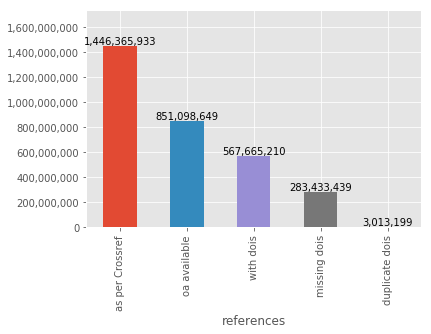

In [9]:
printmd('### Reference counts')
printmd('Out of the *{:,}* references in Crossref, **{:.2f}%** are open (*{:,}*).'.format(
    int(df_summary['reference_count']['sum']),
    100.0 * df_summary['num_references']['sum'] / df_summary['reference_count']['sum'],
    int(df_summary['num_references']['sum'])
))

show_counts([
    ['as per Crossref', df_summary['reference_count']['sum']],
    ['oa available', df_summary['num_references']['sum']],
    ['with dois', df_summary['num_references']['sum'] - df_summary['num_citations_without_doi']['sum']],
    ['missing dois', df_summary['num_citations_without_doi']['sum']],
    ['duplicate dois', df_summary['num_duplicate_citation_dois']['sum']]
], 'references')

In [10]:
printmd('### Reference stats')
df_reference_stat = pd.read_csv(os.path.join(data_path, reference_stats_filename), sep='\t')
df_reference_stat['examples'] = df_reference_stat['examples'].map(lambda x: json.loads(x))
df_reference_stat['examples_without_source'] = df_reference_stat['examples'].map(lambda x: [y[1] for y in x])
df_reference_stat = df_reference_stat.sort_values('count', ascending=False)
df_reference_stat.drop('examples', axis=1).head(10)

### Reference stats

,type,key,count,examples_without_source
921552,year,NaN,79233328,"[{'key': 'S1935789300003219_ref042', 'unstruct..."
864147,total_first_subject_area,NaN,75514508,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,key_combination,key|unstructured,70930410,"[{'key': 'S1935789300003219_ref042', 'unstruct..."
1,key_combination,author|key|volume-title|year,39450593,"[{'key': 'S1935789313000591_ref17', 'author': ..."
2,key_combination,author|first-page|journal-title|key|volume|year,29013838,"[{'key': 'S1935789300003165_ref020', 'author':..."
3,key_combination,author|first-page|journal-title|key|unstructur...,25505471,[{'key': '10.1002/(SICI)1096-8628(20000207)96:...
4,key_combination,author|key|unstructured|volume-title|year,19137676,[{'key': '10.1002/(SICI)1096-8628(19960102)61:...
5,key_combination,article-title|author|first-page|journal-title|...,18917337,"[{'key': 'S1935789300003219_ref014', 'first-pa..."
864470,total_publisher,Elsevier BV,16342614,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
72522,non_oa_ref_first_subject_area,NaN,12150971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [11]:
printmd('### Reference stats are aggregated by different \'types\'')
print('\n'.join(set(df_reference_stat['type'].values)))

### Reference stats are aggregated by different 'types'

non_oa_ref_first_subject_area
total_publisher
non_oa_ref_countainer_title
key_combination
non_oa_ref_created
total_first_subject_area
non_oa_ref_publisher
total_countainer_title
year
total_created


### Count of referenced work by key combinations (populated fields in reference)

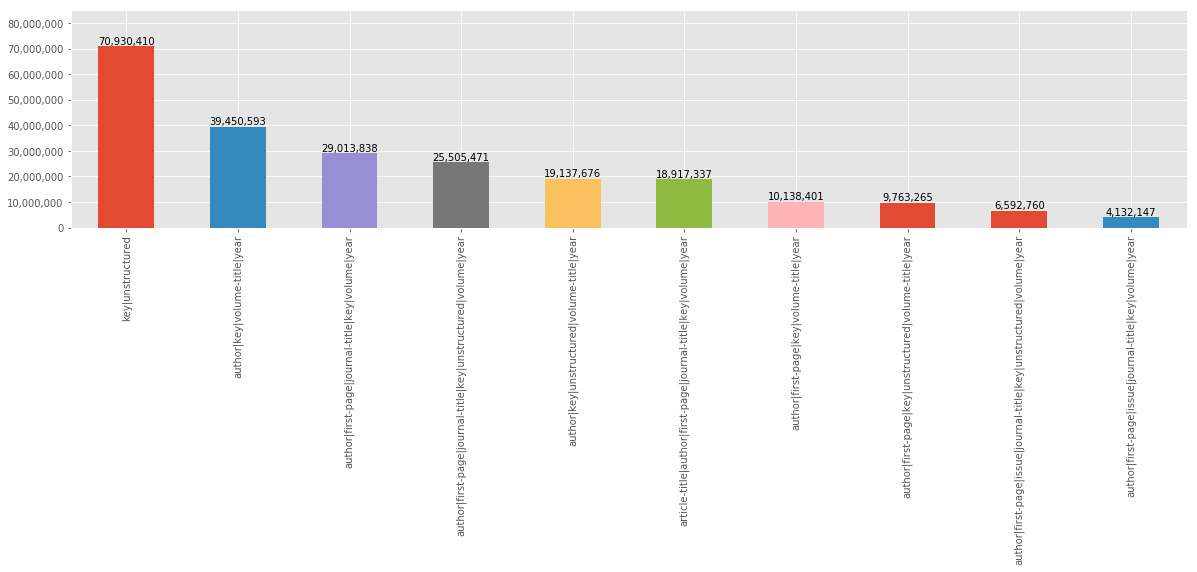

In [12]:
printmd('### Count of referenced work by key combinations (populated fields in reference)')

df_reference_key_combination_stat = (
    df_reference_stat[df_reference_stat['type'] == 'key_combination']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_reference_key_combination_stat['count'].head(10), figsize=(20, 4))

### Count of referenced work by year, sorted descending by year

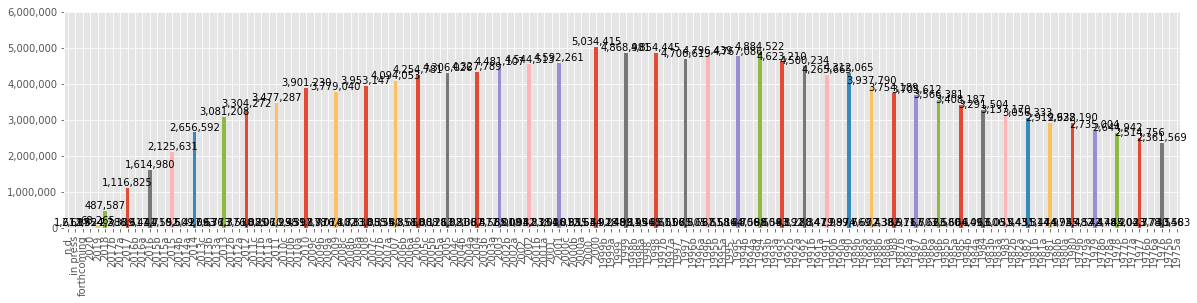

In [13]:
printmd('### Count of referenced work by year, sorted descending by year')

df_reference_year_stat = (
    df_reference_stat[df_reference_stat['type'] == 'year']
    .drop('type', axis=1)
    .sort_values('key', ascending=False)
    .set_index('key')
)
df_reference_year_stat = df_reference_year_stat[df_reference_year_stat['count'] > 1000]
show_counts(df_reference_year_stat['count'].head(150), figsize=(20, 4))

In [14]:
set(df_reference_stat['type'])

{'key_combination',
 'non_oa_ref_countainer_title',
 'non_oa_ref_created',
 'non_oa_ref_first_subject_area',
 'non_oa_ref_publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

### Count of non-oa work by publisher, sorted descending

key
Elsevier BV                                                 0.690575
IEEE                                                        0.828127
Ovid Technologies (Wolters Kluwer Health)                   0.354177
American Chemical Society (ACS)                             0.346757
Institute of Electrical and Electronics Engineers (IEEE)    0.658336
IOP Publishing                                              0.776109
Elsevier                                                    0.559011
Mary Ann Liebert Inc                                        0.836376
Medknow                                                     0.663512
Institution of Engineering and Technology (IET)             0.586324
Name: count, dtype: float64


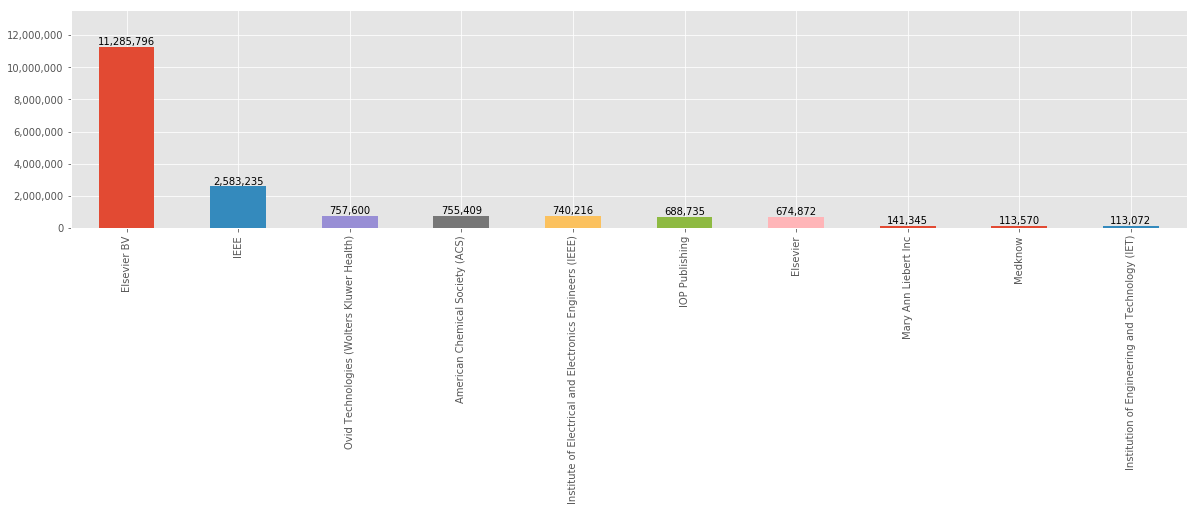

In [15]:
printmd('### Count of non-oa work by publisher, sorted descending')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)

df_temp_total = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# print(df_temp_total.head())
print((df_temp['count'].head(10) / df_temp_total['count']).dropna())
show_counts(df_temp['count'].head(10), figsize=(20, 4))

### Percentage of non-oa work by publisher (>10k works), sorted descending by percentage

key
Mary Ann Liebert Inc    0.836376
IEEE                    0.828127
IOP Publishing          0.776109
Elsevier BV             0.690575
Medknow                 0.663512
Name: count, dtype: float64


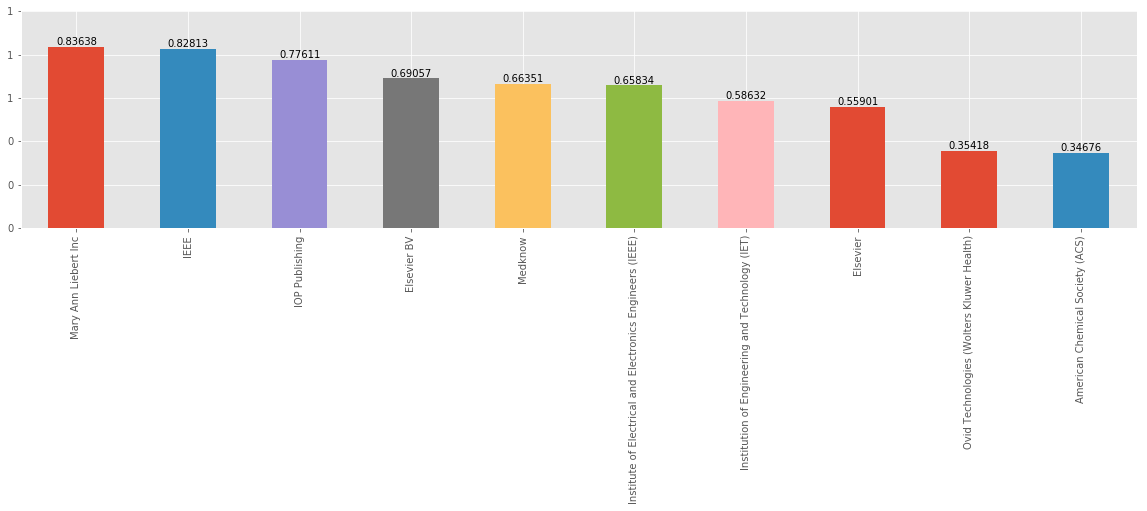

In [16]:
printmd('### Percentage of non-oa work by publisher (>10k works), sorted descending by percentage')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp2 = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp = df_temp[df_temp['count'] > 100000]
# df_temp = df_temp[df_temp2['count'] > 10000]
# df_temp2 = df_temp2[df_temp2['count'] > 10000]
df_temp3 = df_temp.copy()
df_temp3['count'] = df_temp3['count'] / df_temp2['count']
print(df_temp3['count'].sort_values(ascending=False).head())
show_counts(df_temp3['count'].sort_values(ascending=False).head(10), number_format='{:,.5f}', figsize=(20, 4))

### Non-oa works by container title

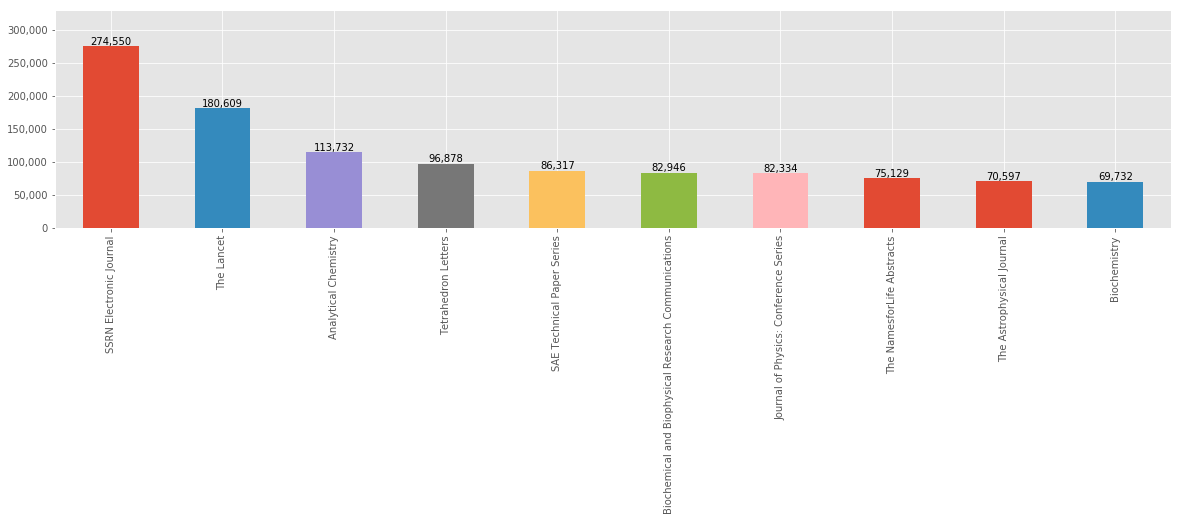

In [17]:
printmd('### Non-oa works by container title')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_countainer_title']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

### Non-oa works by first subject area

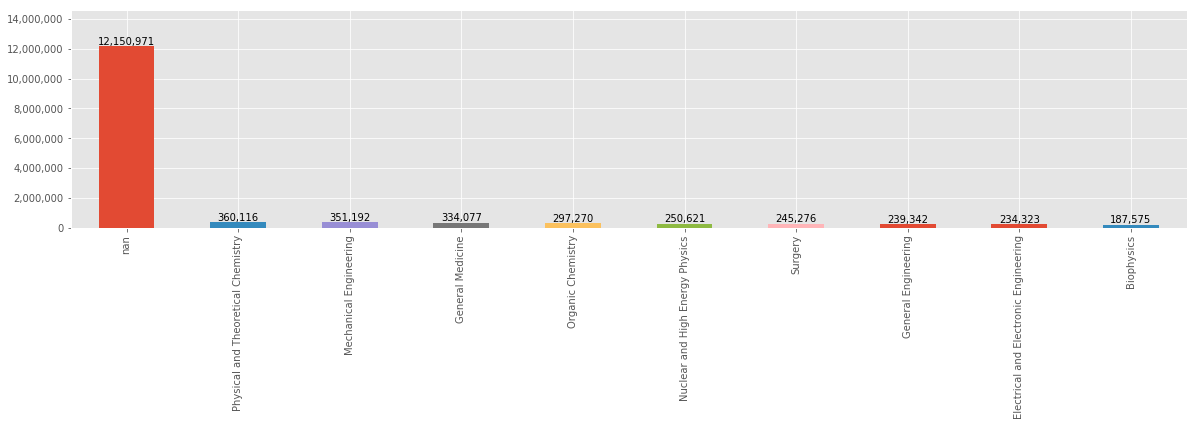

In [18]:
printmd('### Non-oa works by first subject area')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_first_subject_area']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

### Non-oa works by creation date (year)

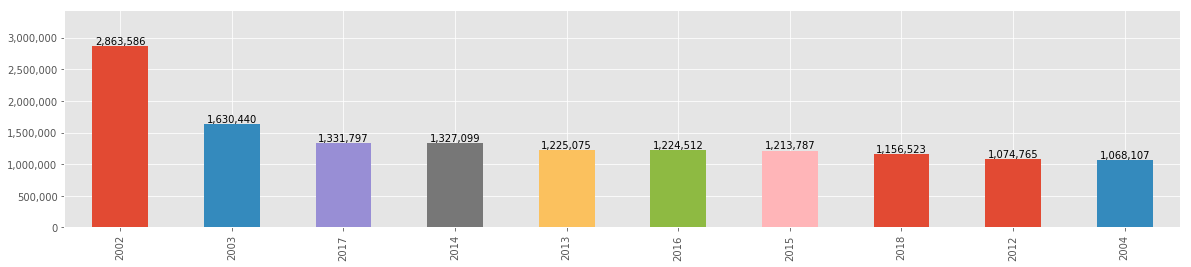

In [19]:
printmd('### Non-oa works by creation date (year)')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_created']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

## More detailed analysis on the summaries by type and publisher

In [20]:
df_summary_by_type_and_publisher = pd.read_csv(
    os.path.join(data_path, summary_by_type_and_publisher_stats_filename), sep='\t'
).rename(columns={
    'reference_count': 'reference_count_crossref',
    'num_references': 'reference_count_oa'
})

# fill na type and publisher with blank (otherwise causes issues with groupby)
df_summary_by_type_and_publisher[['type', 'publisher']] = (
    df_summary_by_type_and_publisher[['type', 'publisher']].fillna('')
)

# drop non-numeric stat value 'type' and convert to numeric values
df_summary_by_type_and_publisher = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary_by_type_and_publisher.head(3)

,type,publisher,stat,doi,title,reference_count_crossref,referenced_by_count,created,container_title,author_count,first_subject_area,subject_areas,has_references,reference_count_oa,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
0,,,count,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,,,count_non_zero,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,,,count_numeric,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,NaN


In [21]:
printmd('### Work counts by type and publisher')

df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count'
].groupby(['type', 'publisher'])['doi'].sum().sort_values(ascending=False).to_frame('work_count')

df_summary_by_type_and_publisher_non_zero_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count_non_zero'
].groupby(['type', 'publisher'])[[
    'reference_count_crossref', 'reference_count_oa'
]].sum().rename(columns={
    'reference_count_crossref': 'has_nonzero_reference_count_crossref',
    'reference_count_oa': 'has_nonzero_reference_count_oa'
})

df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher_work_counts.merge(
    df_summary_by_type_and_publisher_non_zero_counts, how='outer', left_index=True, right_index=True
).astype(int)

# sanity check
assert int(df_summary_by_type_and_publisher_work_counts.sum()[0]) == int(df_summary['has_references']['count'])

df_summary_by_type_and_publisher_work_counts['p_oa'] = (
    100.0 * df_summary_by_type_and_publisher_work_counts['has_nonzero_reference_count_oa'] /
    df_summary_by_type_and_publisher_work_counts['has_nonzero_reference_count_crossref']
)

format_columns(df_summary_by_type_and_publisher_work_counts.sort_values(
    'work_count', ascending=False
).head())

### Work counts by type and publisher

work_count  \
type            publisher                                             
journal-article Elsevier BV                              16,339,851   
                Wiley                                     8,047,211   
                Springer Science and Business Media LLC   4,464,416   
                Informa UK Limited                        4,281,233   
                Springer Nature                           3,281,604   

                                                        has_nonzero_reference_count_crossref  \
type            publisher                                                                      
journal-article Elsevier BV                                                       11,285,796   
                Wiley                                                              5,583,310   
                Springer Science and Business Media LLC                            3,469,369   
                Informa UK Limited                                                 2,792,654   
                Springer Nature                                                    1,846,267   

                                                        has_nonzero_reference_count_oa  \
type            publisher                                                                
journal-article Elsevier BV                                                          0   
                Wiley                                                        5,583,310   
                Springer Science and Business Media LLC                      3,465,542   
                Informa UK Limited                                           2,776,404   
                Springer Nature                                              1,844,492   

                                                            p_oa  
type            publisher                                         
journal-article Elsevier BV                                0.00%  
                Wiley                                    100.00%  
                Springer Science and Business Media LLC   99.89%  
                Informa UK Limited                        99.42%  
                Springer Nature                           99.90%

In [22]:
printmd('### Total work counts')

(
    df_summary_by_type_and_publisher_work_counts.reset_index()
    .drop(['type', 'publisher'], axis=1)
    .sum(axis=0)
    .to_frame('total')
    .applymap(format_count)
)

### Total work counts

,total
work_count,"109,738,648"
has_nonzero_reference_count_crossref,"48,992,325"
has_nonzero_reference_count_oa,"27,947,414"
p_oa,"192,206"


In [23]:
printmd('### Work counts by type')

df_temp = (
    df_summary_by_type_and_publisher_work_counts.reset_index().groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head()
)

def show_oa_ref_work_percentages_by_type(df):
    for work_type, has_nonzero_reference_count_crossref, has_nonzero_reference_count_oa in zip(
        df.index,
        df['has_nonzero_reference_count_crossref'],
        df['has_nonzero_reference_count_oa']
    ):
        if not has_nonzero_reference_count_crossref:
            continue
        printmd('Out of the *{:,}* works of type *{:}* with references in Crossref, **{:.2f}%** are open (*{:,}*).'.format(
            int(has_nonzero_reference_count_crossref),
            work_type,
            100.0 * has_nonzero_reference_count_oa / has_nonzero_reference_count_crossref,
            int(has_nonzero_reference_count_oa)
        ))

df_temp['p_oa'] = (
    100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']
)

show_oa_ref_work_percentages_by_type(df_temp)

format_columns(df_temp)

### Work counts by type

Out of the *40,291,216* works of type *journal-article* with references in Crossref, **56.98%** are open (*22,956,661*).

Out of the *4,966,411* works of type *book-chapter* with references in Crossref, **85.16%** are open (*4,229,448*).

Out of the *3,372,899* works of type *proceedings-article* with references in Crossref, **14.31%** are open (*482,620*).

Out of the *11* works of type *component* with references in Crossref, **18.18%** are open (*2*).

Out of the *75,416* works of type *dataset* with references in Crossref, **0.04%** are open (*30*).

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa,p_oa
type,,,,
journal-article,"79,960,807","40,291,216","22,956,661",56.98%
book-chapter,"13,361,218","4,966,411","4,229,448",85.16%
proceedings-article,"6,003,592","3,372,899","482,620",14.31%
component,"3,863,919",11,2,18.18%
dataset,"1,814,101","75,416",30,0.04%


In [24]:
printmd('### Journal vs non-journal-article type')

def type_to_journal_non_journal_article(df):
    df = df.copy()
    df['type'] = df['type'].map(lambda x: 'non-journal-article' if x != 'journal-article' else x)
    return df

df_temp = (
    type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )
    .groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head()
)

df_temp['p_oa'] = 100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']

show_oa_ref_work_percentages_by_type(df_temp)

format_columns(df_temp)

### Journal vs non-journal-article type

Out of the *40,291,216* works of type *journal-article* with references in Crossref, **56.98%** are open (*22,956,661*).

Out of the *8,701,109* works of type *non-journal-article* with references in Crossref, **57.36%** are open (*4,990,753*).

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa,p_oa
type,,,,
journal-article,"79,960,807","40,291,216","22,956,661",56.98%
non-journal-article,"29,777,841","8,701,109","4,990,753",57.36%


In [25]:
printmd('### By publisher')

def select_top_publishers(df, count=5):
    top_publishers = (
        df.groupby('publisher').sum()
        .sort_values(by='work_count', ascending=False)
        .index.values
    )
    return df[df['publisher'].isin(top_publishers[:count])]

df_temp = (
    type_to_journal_non_journal_article(
        select_top_publishers(df_summary_by_type_and_publisher_work_counts.reset_index())
    )
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False)
)

df_temp['p_oa'] = (
    100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']
)

format_columns(df_temp)

### By publisher

work_count  \
type                publisher                                             
journal-article     Elsevier BV                              16,339,851   
                    Wiley                                     8,047,211   
                    Springer Science and Business Media LLC   4,464,416   
                    Informa UK Limited                        4,281,233   
                    Springer Nature                           3,281,604   
non-journal-article Wiley                                       367,169   
                    Springer Nature                              21,202   
                    Informa UK Limited                            3,907   
                    Elsevier BV                                   2,763   
                    Springer Science and Business Media LLC         552   

                                                            has_nonzero_reference_count_crossref  \
type                publisher                                                                      
journal-article     Elsevier BV                                                       11,285,796   
                    Wiley                                                              5,583,310   
                    Springer Science and Business Media LLC                            3,469,369   
                    Informa UK Limited                                                 2,792,654   
                    Springer Nature                                                    1,846,267   
non-journal-article Wiley                                                                  3,661   
                    Springer Nature                                                            0   
                    Informa UK Limited                                                         0   
                    Elsevier BV                                                                0   
                    Springer Science and Business Media LLC                                    0   

                                                            has_nonzero_reference_count_oa  \
type                publisher                                                                
journal-article     Elsevier BV                                                          0   
                    Wiley                                                        5,583,310   
                    Springer Science and Business Media LLC                      3,465,542   
                    Informa UK Limited                                           2,776,404   
                    Springer Nature                                              1,844,492   
non-journal-article Wiley                                                            3,661   
                    Springer Nature                                                      0   
                    Informa UK Limited                                                   0   
                    Elsevier BV                                                          0   
                    Springer Science and Business Media LLC                              0   

                                                                p_oa  
type                publisher                                         
journal-article     Elsevier BV                                0.00%  
                    Wiley                                    100.00%  
                    Springer Science and Business Media LLC   99.89%  
                    Informa UK Limited                        99.42%  
                    Springer Nature                           99.90%  
non-journal-article Wiley                                    100.00%  
                    Springer Nature                             nan%  
                    Informa UK Limited                          nan%  
                    Elsevier BV                                 nan%  
                    Springer Science and Business

In [26]:
printmd('### By normalised publisher')

def normalise_publisher(df):
    elsevier_names = [
        s for s in df['publisher'].unique()
        if not pd.isnull(s) and 'elsevier' in s.lower()
    ]
    return df.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })

df_temp = (
    select_top_publishers(normalise_publisher(type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )))
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False)
)

df_temp['p_oa'] = (
    100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']
)

format_columns(df_temp)

### By normalised publisher

work_count  \
type                publisher                                             
journal-article     Elsevier (all)                           16,339,851   
                    Wiley                                     8,047,211   
                    Springer Science and Business Media LLC   4,464,416   
                    Informa UK Limited                        4,281,233   
                    Springer Nature                           3,281,604   
non-journal-article Elsevier (all)                            1,210,213   
                    Wiley                                       367,169   
                    Springer Nature                              21,202   
                    Informa UK Limited                            3,907   
                    Springer Science and Business Media LLC         552   

                                                            has_nonzero_reference_count_crossref  \
type                publisher                                                                      
journal-article     Elsevier (all)                                                    11,285,796   
                    Wiley                                                              5,583,310   
                    Springer Science and Business Media LLC                            3,469,369   
                    Informa UK Limited                                                 2,792,654   
                    Springer Nature                                                    1,846,267   
non-journal-article Elsevier (all)                                                       675,293   
                    Wiley                                                                  3,661   
                    Springer Nature                                                            0   
                    Informa UK Limited                                                         0   
                    Springer Science and Business Media LLC                                    0   

                                                            has_nonzero_reference_count_oa  \
type                publisher                                                                
journal-article     Elsevier (all)                                                       0   
                    Wiley                                                        5,583,310   
                    Springer Science and Business Media LLC                      3,465,542   
                    Informa UK Limited                                           2,776,404   
                    Springer Nature                                              1,844,492   
non-journal-article Elsevier (all)                                                     421   
                    Wiley                                                            3,661   
                    Springer Nature                                                      0   
                    Informa UK Limited                                                   0   
                    Springer Science and Business Media LLC                              0   

                                                                p_oa  
type                publisher                                         
journal-article     Elsevier (all)                             0.00%  
                    Wiley                                    100.00%  
                    Springer Science and Business Media LLC   99.89%  
                    Informa UK Limited                        99.42%  
                    Springer Nature                           99.90%  
non-journal-article Elsevier (all)                             0.06%  
                    Wiley                                    100.00%  
                    Springer Nature                             nan%  
                    Informa UK Limited                          nan%  
                    Springer Science and Business

In [27]:
printmd('### Sanity check, the grouped summary should equal the ungrouped summary')

df_summary_by_type_and_publisher_sums = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'sum'
]
total_reference_count_according_to_crossref = df_summary_by_type_and_publisher_sums['reference_count_crossref'].sum()
assert total_reference_count_according_to_crossref == df_summary['reference_count']['sum']
(
    df_summary_by_type_and_publisher_sums[['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .map(format_count)
    .to_frame('sum')
)

### Sanity check, the grouped summary should equal the ungrouped summary

,sum
reference_count_crossref,"1,446,365,933"
reference_count_oa,"851,098,649"


In [28]:
printmd('### Total references by type')

df_temp = (
    df_summary_by_type_and_publisher_sums.groupby('type')
    [['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .sort_values('reference_count_crossref', ascending=False)
    .head()
)

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Total references by type

,reference_count_crossref,reference_count_oa,p_oa
type,,,
journal-article,"1,199,588,788","685,022,593",57.10%
book-chapter,"190,323,744","147,448,104",77.47%
proceedings-article,"44,855,360","7,342,649",16.37%
reference-entry,"6,599,007","6,598,789",100.00%
posted-content,"2,706,066","2,705,849",99.99%


In [29]:
printmd('### Publishers with the highest amount of references')

df_temp = (
    df_summary_by_type_and_publisher_sums.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head()

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Publishers with the highest amount of references

,reference_count_crossref,reference_count_oa,p_oa
publisher,,,
Elsevier BV,"355,713,781",0,0.00%
Wiley,"155,877,856","155,877,856",100.00%
Springer Science and Business Media LLC,"100,336,210","100,193,985",99.86%
Informa UK Limited,"81,434,261","81,057,438",99.54%
Springer Nature,"56,198,393","56,129,361",99.88%


In [30]:
printmd('### Elsevier uses mutliple names, treat them as one')

elsevier_names = [
    s for s in df_summary_by_type_and_publisher_sums['publisher'].unique()
    if not pd.isnull(s) and 'elsevier' in s.lower()
]
printmd('* %s' % '\n* '.join(elsevier_names))
df_summary_by_type_and_publisher_sums_merged_publisher = (
    df_summary_by_type_and_publisher_sums.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })
)

### Elsevier uses mutliple names, treat them as one

* Elsevier
* Elsevier Inc.
* Elsevier BV
* "Elsevier",
* Elsevier Masson (programme ReLIRE)
* Elsevier Pub. Co.
* Elsevier Pub. Co.,
* Elsevier,
* Publishing company "Elsevier,",
* Elsevier IFAC
* Elsevier, IFAC
* IFAC, Elsevier

In [31]:
printmd('### Publishers with the highest amount of references - this time with merged publisher names')

df_temp = (
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head()

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Publishers with the highest amount of references - this time with merged publisher names

,reference_count_crossref,reference_count_oa,p_oa
publisher,,,
Elsevier (all),"396,031,893","14,984",0.00%
Wiley,"155,877,856","155,877,856",100.00%
Springer Science and Business Media LLC,"100,336,210","100,193,985",99.86%
Informa UK Limited,"81,434,261","81,057,438",99.54%
Springer Nature,"56,198,393","56,129,361",99.88%


In [32]:
printmd('### Publishers with the highest amount of references (by type) - this time with merged publisher names')

df_temp = (
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby(['type', 'publisher'])
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head()

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Publishers with the highest amount of references (by type) - this time with merged publisher names

reference_count_crossref  \
type            publisher                                                          
journal-article Elsevier (all)                                       355,713,781   
                Wiley                                                155,663,089   
                Springer Science and Business Media LLC              100,336,210   
                Informa UK Limited                                    81,434,261   
                Springer Nature                                       56,198,393   

                                                        reference_count_oa  \
type            publisher                                                    
journal-article Elsevier (all)                                           0   
                Wiley                                          155,663,089   
                Springer Science and Business Media LLC        100,193,985   
                Informa UK Limited                              81,057,438   
                Springer Nature                                 56,129,361   

                                                            p_oa  
type            publisher                                         
journal-article Elsevier (all)                             0.00%  
                Wiley                                    100.00%  
                Springer Science and Business Media LLC   99.86%  
                Informa UK Limited                        99.54%  
                Springer Nature                           99.88%